In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to include channel dimension (for CNN)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to one-hot encoded format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a function to create the model
def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
        
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Define parameter grid for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

best_score = 0
best_params = {}

# Perform grid search
for optimizer in param_grid['optimizer']:
    for learning_rate in param_grid['learning_rate']:
        model = create_model(optimizer=optimizer, learning_rate=learning_rate)
        
        # Define callbacks
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
        
        # Train the model
        history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[reduce_lr], verbose=0)
        
        # Evaluate the model on validation set
        val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
        
        print("Parameters: optimizer={}, learning_rate={}".format(optimizer, learning_rate))
        print("Validation Accuracy:", val_accuracy)
        
        # Update best score and parameters
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params['optimizer'] = optimizer
            best_params['learning_rate'] = learning_rate

print("Best parameters:", best_params)
print("Best validation accuracy:", best_score)






Parameters: optimizer=adam, learning_rate=0.001
Validation Accuracy: 0.9916999936103821
Parameters: optimizer=adam, learning_rate=0.01
Validation Accuracy: 0.9922000169754028
Parameters: optimizer=adam, learning_rate=0.1
Validation Accuracy: 0.951200008392334
Parameters: optimizer=rmsprop, learning_rate=0.001
Validation Accuracy: 0.9927999973297119
Parameters: optimizer=rmsprop, learning_rate=0.01
Validation Accuracy: 0.9904000163078308
Parameters: optimizer=rmsprop, learning_rate=0.1
Validation Accuracy: 0.11349999904632568
Best parameters: {'optimizer': 'rmsprop', 'learning_rate': 0.001}
Best validation accuracy: 0.9927999973297119


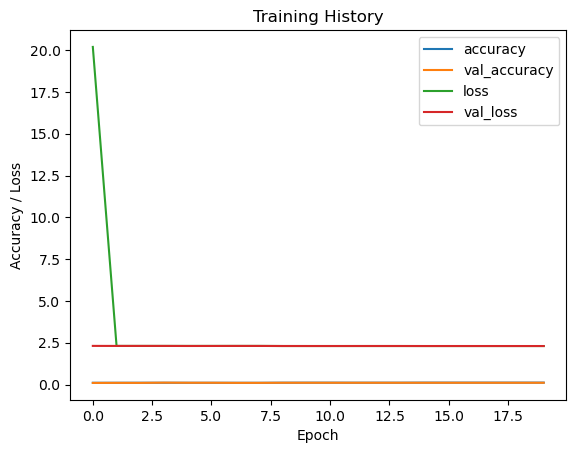

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()